In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


In [2]:
from numpy.fft import fft, ifft

In [3]:
temp_df = pd.read_csv('C:/Users/sande/Major Project/Dataset/GlobalTemperatures.csv' ,index_col='dt', parse_dates=True)

In [4]:
temp_df.fillna(method='ffill')

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
1750-06-01,12.937,1.724,NaN,NaN,NaN,NaN,NaN,NaN
1750-07-01,15.868,1.911,NaN,NaN,NaN,NaN,NaN,NaN
1750-08-01,14.750,2.231,NaN,NaN,NaN,NaN,NaN,NaN
1750-09-01,11.413,2.637,NaN,NaN,NaN,NaN,NaN,NaN


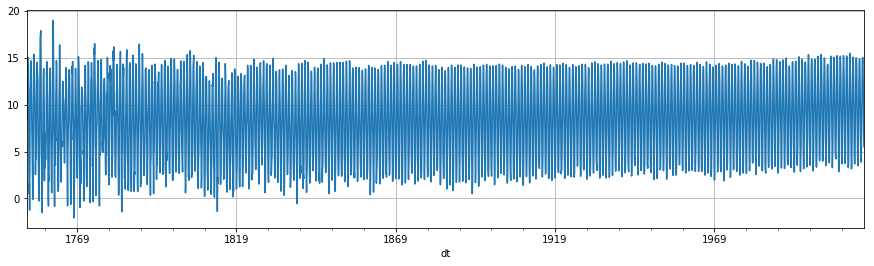

In [5]:
temp_df = temp_df['1753-03-21':]

# Plot initial data
plt.figure(figsize=(15,4))
temp_df['LandAverageTemperature'].plot()
plt.grid()
plt.show()

C:\Users\sande\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """
C:\Users\sande\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  if sys.path[0] == '':
C:\Users\sande\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
C:\Users\sande\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()


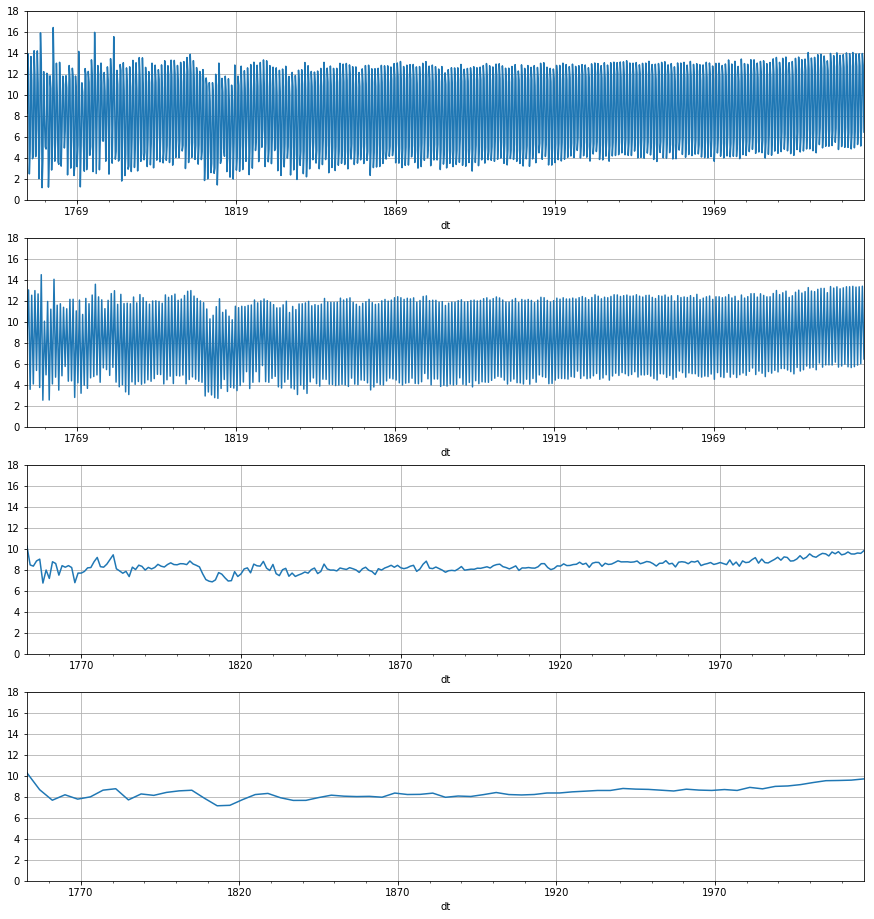

In [6]:
# Resample the series and visualise at different scales
plt.figure(figsize=(15,16))

# Seasonal
seasonal_temp = temp_df.resample('3M', how='mean')
plt.subplot(4,1,1)
seasonal_temp['LandAverageTemperature'].plot()
plt.ylim([0,18])
plt.grid()

# half year
bi_seasonal_temp = temp_df.resample('6M', how='mean')
plt.subplot(4,1,2)
bi_seasonal_temp['LandAverageTemperature'].plot()
plt.ylim([0,18])
plt.grid()

# Yearly
year_temp = temp_df.resample('A', how='mean')
plt.subplot(4,1,3)
year_temp['LandAverageTemperature'].plot()
plt.ylim([0,18])
plt.grid()

# 4-Yearly
year_4_temp = temp_df.resample('4A', how='mean')
plt.subplot(4,1,4)
year_4_temp['LandAverageTemperature'].plot()
plt.ylim([0,18])
plt.grid()
plt.show()

In [7]:
# Analysing seasonal changes over time
seasonal_lat = np.array(seasonal_temp['LandAverageTemperature'])

# Parse into stations
spring = seasonal_lat[::4]
summer = seasonal_lat[1::4]
fall = seasonal_lat[2::4]
winter = seasonal_lat[3::4]


plt.figure(figsize=(12,3))
ax = plt.subplot(1,1,1)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])

plt.plot(spring, label='Spring')
plt.plot(summer, label='Summer')
plt.plot(fall, label='Fall')
plt.plot(winter, label='Winter')

plt.xlim([0, len(summer)])
plt.grid()
plt.xlabel('Year')
plt.ylabel('Average Temperature [C]')

plt.legend(bbox_to_anchor=(1.18, 1.04))

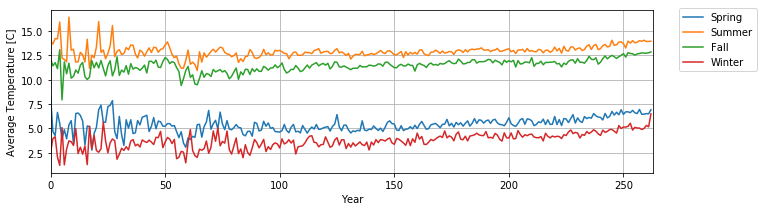

In [8]:
plt.show()

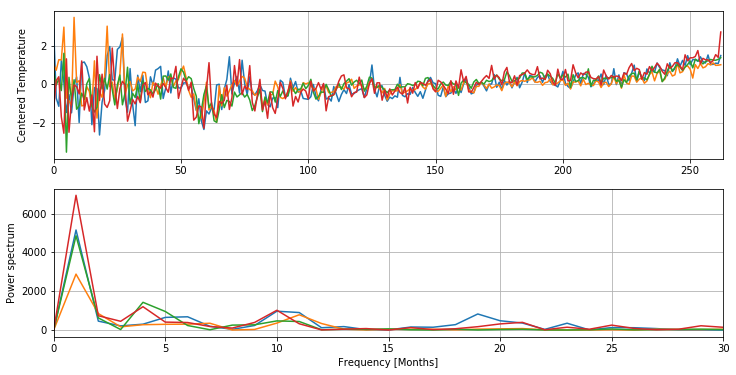

In [9]:
# Seasonal analysis
seasons = [spring, summer, fall, winter]
seasons_string = ['spring', 'summer', 'fall', 'winter']

# Detrend for each of the seasons
seasons_average = [np.average(season) for season in seasons]
seasons_det = [seasons[i] - seasons_average[i] for i in range(len(seasons))]

plt.figure(figsize=[12,6])
plt.subplot(2,1,1)
[plt.plot(seasons_det[i], label=seasons_string[i]) for i in range(len(seasons))]
plt.ylabel('Centered Temperature')
plt.grid()
plt.xlim([0, len(seasons_det[0])])


## do the regression analysis
# Get the fourier coefficients
seasons_fft = [fft(season) for season in seasons_det]

# Get the power spectrum
seasons_ps = [np.abs(season)**2 for season in seasons_fft]

plt.subplot(2,1,2)
[plt.plot(seasons_ps[i], label=seasons_string[i]) for i in range(len(seasons))]
plt.xlabel('Frequency [Months]')
plt.ylabel('Power spectrum')
plt.xlim([0, 30])
plt.grid()
plt.show()

C:\Users\sande\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


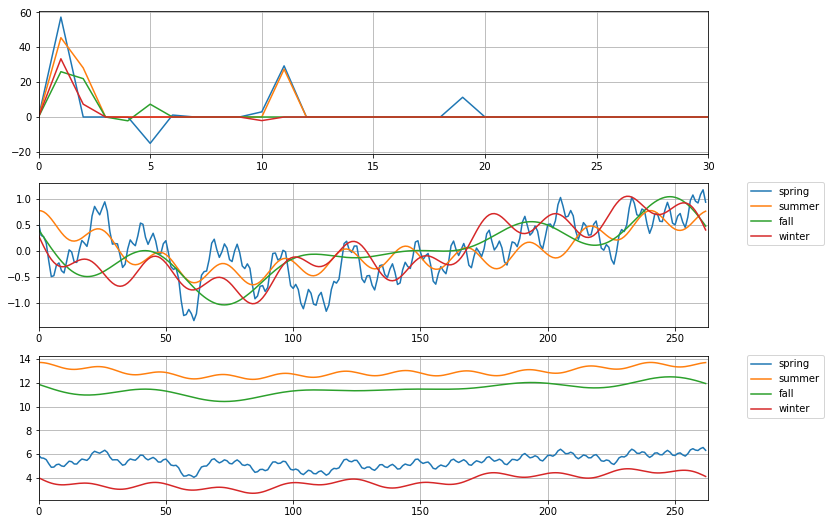

In [10]:
## Clean each of the time series in the seasons by selecting such that the power spectrum is higher than 500
clean_seasons_ps = seasons_ps[:]
clean_seasons_ps = [[seasons_fft[season_i][year_i] if seasons_ps[season_i][year_i] > 500 else 0 
                     for year_i in range(len(seasons_fft[0]))] for season_i in range(len(seasons_ps))]

plt.figure(figsize=[12,9])
plt.subplot(3,1,1)
plt.plot(np.transpose(clean_seasons_ps))
plt.xlim([0, 30])
plt.grid()

## redraw the series only with significant harmonics
seasons_series_clean = [np.real(ifft(serie)) for serie in clean_seasons_ps]

plt.subplot(3,1,2)
[plt.plot(seasons_series_clean[i], label=seasons_string[i]) for i in range(len(seasons))]
plt.xlim([0, len(seasons_det[0])])
plt.legend(bbox_to_anchor=(1.18, 1.04))
plt.grid()

## put the trend back into the dataset
seasonal_trends = [seasons_series_clean[i] + seasons_average[i] for i in range(len(seasons))]

plt.subplot(3,1,3)
[plt.plot(seasonal_trends[i], label=seasons_string[i]) for i in range(len(seasons))]
plt.xlim([0, len(seasons_det[0])])
plt.legend(bbox_to_anchor=(1.18, 1.04))
plt.grid()
plt.show()